# Session 1: Basic Operations and Basic Plotting

In this notebook we replicate examples from Chapters 6-8 of the Lecture Notes using Python. Packages `pandas` and `plotnine` will provide similar functionality to what we saw using `tidyverse`. Datasets are available at `https://www.hcbravo.org/IntroDataSci/static/<filename>.csv`, and assumed to be downloaded to a subdirectory `data`.

First we load the same dataset

In [1]:
import pandas as pd
arrest_tab = pd.read_csv('data/BPD_Arrests.csv')

In [2]:
arrest_tab.head()

,arrest,age,race,sex,arrestDate,arrestTime,arrestLocation,incidentOffense,incidentLocation,charge,chargeDescription,district,post,neighborhood,Location 1
0,11126858.0,23,B,M,01/01/2011,00:00:00,NaN,Unknown Offense,NaN,3 0233,Cds:P W/I Dist:Narc || Cds:Poss W/Intent Dist:...,NaN,NaN,NaN,NaN
1,11127013.0,37,B,M,01/01/2011,00:01:00,2000 Wilkens Ave,79-Other,Wilkens Av & S Payson St,1 1425,Reckless Endangerment || Hand Gun Violation,SOUTHERN,934.0,Carrollton Ridge,"(39.2814026274, -76.6483635135)"
2,11126887.0,46,B,M,01/01/2011,00:01:00,2800 Mayfield Ave,Unknown Offense,NaN,NaN,Unknown Charge,NORTHEASTERN,415.0,Belair-Edison,"(39.3227699160, -76.5735750473)"
3,11126873.0,50,B,M,01/01/2011,00:04:00,2100 Ashburton St,79-Other,2100 Ashburton St,1 1106,Reg Firearm:Illegal Possession || Hgv,WESTERN,735.0,Panway/Braddish Avenue,"(39.3117196723, -76.6623546313)"
4,11126968.0,33,B,M,01/01/2011,00:05:00,4000 Wilsby Ave,Unknown Offense,1700 Aliceanna St,NaN,Unknown Charge,NORTHERN,525.0,Pen Lucy,"(39.3382885254, -76.6045667070)"


## Operations that subset attributes

First we look at the different variants of `select`

In [3]:
# selection by attribute name
arrest_tab[['age','sex','district']].head()

,age,sex,district
0,23,M,NaN
1,37,M,SOUTHERN
2,46,M,NORTHEASTERN
3,50,M,WESTERN
4,33,M,NORTHERN


In [4]:
# selection by attribute index
arrest_tab.iloc[:,[0,2,3]].head()


,arrest,race,sex
0,11126858.0,B,M
1,11127013.0,B,M
2,11126887.0,B,M
3,11126873.0,B,M
4,11126968.0,B,M


In [5]:
# select a slice of attributes
arrest_tab.iloc[:,:5].head()

,arrest,age,race,sex,arrestDate
0,11126858.0,23,B,M,01/01/2011
1,11127013.0,37,B,M,01/01/2011
2,11126887.0,46,B,M,01/01/2011
3,11126873.0,50,B,M,01/01/2011
4,11126968.0,33,B,M,01/01/2011


In [6]:
# rename attributes
arrest_tab.rename(columns={'arrestDate': 'arrest_date'}).head()

,arrest,age,race,sex,arrest_date,arrestTime,arrestLocation,incidentOffense,incidentLocation,charge,chargeDescription,district,post,neighborhood,Location 1
0,11126858.0,23,B,M,01/01/2011,00:00:00,NaN,Unknown Offense,NaN,3 0233,Cds:P W/I Dist:Narc || Cds:Poss W/Intent Dist:...,NaN,NaN,NaN,NaN
1,11127013.0,37,B,M,01/01/2011,00:01:00,2000 Wilkens Ave,79-Other,Wilkens Av & S Payson St,1 1425,Reckless Endangerment || Hand Gun Violation,SOUTHERN,934.0,Carrollton Ridge,"(39.2814026274, -76.6483635135)"
2,11126887.0,46,B,M,01/01/2011,00:01:00,2800 Mayfield Ave,Unknown Offense,NaN,NaN,Unknown Charge,NORTHEASTERN,415.0,Belair-Edison,"(39.3227699160, -76.5735750473)"
3,11126873.0,50,B,M,01/01/2011,00:04:00,2100 Ashburton St,79-Other,2100 Ashburton St,1 1106,Reg Firearm:Illegal Possession || Hgv,WESTERN,735.0,Panway/Braddish Avenue,"(39.3117196723, -76.6623546313)"
4,11126968.0,33,B,M,01/01/2011,00:05:00,4000 Wilsby Ave,Unknown Offense,1700 Aliceanna St,NaN,Unknown Charge,NORTHERN,525.0,Pen Lucy,"(39.3382885254, -76.6045667070)"


## Operations that subset entitites

Next, we see operations that subset entities

In [7]:
# subset entities by index 
arrest_tab.iloc[[0,2,9],:]

,arrest,age,race,sex,arrestDate,arrestTime,arrestLocation,incidentOffense,incidentLocation,charge,chargeDescription,district,post,neighborhood,Location 1
0,11126858.0,23,B,M,01/01/2011,00:00:00,NaN,Unknown Offense,NaN,3 0233,Cds:P W/I Dist:Narc || Cds:Poss W/Intent Dist:...,NaN,NaN,NaN,NaN
2,11126887.0,46,B,M,01/01/2011,00:01:00,2800 Mayfield Ave,Unknown Offense,NaN,NaN,Unknown Charge,NORTHEASTERN,415.0,Belair-Edison,"(39.3227699160, -76.5735750473)"
9,11127018.0,53,B,M,01/01/2011,00:15:00,3300 Woodland Ave,54-Armed Person,3300 Woodland Av,1 1425,Reckless Endangerment || Hgv,NORTHWESTERN,614.0,Central Park Heights,"(39.3436773374, -76.6727297618)"


In [8]:
# subset entities by a slice of indices
arrest_tab.iloc[:5,]

,arrest,age,race,sex,arrestDate,arrestTime,arrestLocation,incidentOffense,incidentLocation,charge,chargeDescription,district,post,neighborhood,Location 1
0,11126858.0,23,B,M,01/01/2011,00:00:00,NaN,Unknown Offense,NaN,3 0233,Cds:P W/I Dist:Narc || Cds:Poss W/Intent Dist:...,NaN,NaN,NaN,NaN
1,11127013.0,37,B,M,01/01/2011,00:01:00,2000 Wilkens Ave,79-Other,Wilkens Av & S Payson St,1 1425,Reckless Endangerment || Hand Gun Violation,SOUTHERN,934.0,Carrollton Ridge,"(39.2814026274, -76.6483635135)"
2,11126887.0,46,B,M,01/01/2011,00:01:00,2800 Mayfield Ave,Unknown Offense,NaN,NaN,Unknown Charge,NORTHEASTERN,415.0,Belair-Edison,"(39.3227699160, -76.5735750473)"
3,11126873.0,50,B,M,01/01/2011,00:04:00,2100 Ashburton St,79-Other,2100 Ashburton St,1 1106,Reg Firearm:Illegal Possession || Hgv,WESTERN,735.0,Panway/Braddish Avenue,"(39.3117196723, -76.6623546313)"
4,11126968.0,33,B,M,01/01/2011,00:05:00,4000 Wilsby Ave,Unknown Offense,1700 Aliceanna St,NaN,Unknown Charge,NORTHERN,525.0,Pen Lucy,"(39.3382885254, -76.6045667070)"


In [9]:
# subset entities by a non-consecutive slice of indices
arrest_tab.iloc[1:len(arrest_tab):2,].head()

,arrest,age,race,sex,arrestDate,arrestTime,arrestLocation,incidentOffense,incidentLocation,charge,chargeDescription,district,post,neighborhood,Location 1
1,11127013.0,37,B,M,01/01/2011,00:01:00,2000 Wilkens Ave,79-Other,Wilkens Av & S Payson St,1 1425,Reckless Endangerment || Hand Gun Violation,SOUTHERN,934.0,Carrollton Ridge,"(39.2814026274, -76.6483635135)"
3,11126873.0,50,B,M,01/01/2011,00:04:00,2100 Ashburton St,79-Other,2100 Ashburton St,1 1106,Reg Firearm:Illegal Possession || Hgv,WESTERN,735.0,Panway/Braddish Avenue,"(39.3117196723, -76.6623546313)"
5,11127041.0,41,B,M,01/01/2011,00:05:00,2900 Spellman Rd,81-Recovered Property,2900 Spelman Rd,1 1425,Reckless Endangerment || Handgun Violation,SOUTHERN,924.0,Cherry Hill,"(39.2449886230, -76.6273582432)"
7,11126940.0,20,W,M,01/01/2011,00:05:00,5200 Moravia Rd,Unknown Offense,NaN,1 5200,Deadly Weapon-Int/Injure || Aggravated Assault,NORTHEASTERN,436.0,Frankford,"(39.3235271620, -76.5496555072)"
9,11127018.0,53,B,M,01/01/2011,00:15:00,3300 Woodland Ave,54-Armed Person,3300 Woodland Av,1 1425,Reckless Endangerment || Hgv,NORTHWESTERN,614.0,Central Park Heights,"(39.3436773374, -76.6727297618)"


In [10]:
# subset entities that satisfy conditions ('filter')
arrest_tab.query('age < 18').head()

,arrest,age,race,sex,arrestDate,arrestTime,arrestLocation,incidentOffense,incidentLocation,charge,chargeDescription,district,post,neighborhood,Location 1
186,11127698.0,17,B,M,01/03/2011,15:00:00,NaN,Unknown Offense,NaN,1A0007,Murder-Att || Att-Murder,NaN,NaN,NaN,NaN
806,11130540.0,17,B,M,01/07/2011,18:40:00,500 N Athol St,79-Other,500 N Athol Av,1 0621,NaN,NaN,NaN,NaN,NaN
1109,11131601.0,17,A,M,01/10/2011,22:00:00,NaN,Unknown Offense,NaN,2 0705,Armed Robbery || Armed Robbery,NaN,NaN,NaN,NaN
1394,11133119.0,17,B,M,01/13/2011,01:00:00,NaN,Unknown Offense,NaN,1 5212,Handgun On Person || Handgun On Person,NaN,NaN,NaN,NaN
1461,11133667.0,17,B,F,01/13/2011,13:40:00,1400 N Wilmer Ct,Unknown Offense,NaN,1 0521,Theft Less Than $100.00 || Armed Robbery,NaN,NaN,NaN,NaN


In [11]:
# filter on multiple conditions
arrest_tab.query('age >= 18 & age <= 25').head()

,arrest,age,race,sex,arrestDate,arrestTime,arrestLocation,incidentOffense,incidentLocation,charge,chargeDescription,district,post,neighborhood,Location 1
0,11126858.0,23,B,M,01/01/2011,00:00:00,NaN,Unknown Offense,NaN,3 0233,Cds:P W/I Dist:Narc || Cds:Poss W/Intent Dist:...,NaN,NaN,NaN,NaN
7,11126940.0,20,W,M,01/01/2011,00:05:00,5200 Moravia Rd,Unknown Offense,NaN,1 5200,Deadly Weapon-Int/Injure || Aggravated Assault,NORTHEASTERN,436.0,Frankford,"(39.3235271620, -76.5496555072)"
8,11127051.0,24,B,M,01/01/2011,00:07:00,2400 Gainsdbourgh Ct,54-Armed Person,2400 Gainsborough Ct,1 1106,Reg Firearm:Illegal Possession || Firearms Vio...,NaN,NaN,NaN,NaN
11,11126892.0,25,B,M,01/01/2011,00:20:00,2800 Violet Ave,79-Other,2800 Violet Av,1 5212,Handgun On Person || Hgv,NORTHWESTERN,612.0,Park Circle,"(39.3298283117, -76.6618069447)"
14,11126963.0,24,B,M,01/01/2011,00:40:00,3900 Greenmount Ave,79-Other,3900 Greenmount Av,NaN,Unknown Charge,NORTHERN,526.0,Guilford,"(39.3364339198, -76.6095420543)"


In [12]:
# sample some number of entities at random
arrest_tab.sample(n=10)

,arrest,age,race,sex,arrestDate,arrestTime,arrestLocation,incidentOffense,incidentLocation,charge,chargeDescription,district,post,neighborhood,Location 1
25234,11251345.0,20,B,M,06/23/2011,10:30:00,5100 Queensberry Ave,97-Search & Seizure,5100 Queensberry Av,5 3550,Cds:Poss Para || Cds Violation,NORTHWESTERN,615.0,Central Park Heights,"(39.3500168319, -76.6719283535)"
15542,NaN,23,B,M,04/23/2011,18:45:00,4700 Sinclair Ln,Unknown Offense,NaN,NaN,Unknown Charge,NORTHEASTERN,436.0,Parkside,"(39.3190208298, -76.5537618137)"
17692,11212484.0,53,B,M,05/06/2011,19:30:00,2000 North Ave,87-Narcotics,2000 E North Av,2 2210,Trespass-Posted Property || Poss/Marijuana,EASTERN,331.0,Broadway East,"(39.3123594708, -76.5893006446)"
90587,12550486.0,48,B,M,09/12/2012,10:40:00,1100 Riggs Ave,87-Narcotics,1100 Riggs Av,4 3550,Cds:Possess-Not Marihuana || Poss Heroin,WESTERN,715.0,Sandtown-Winchester,"(39.3012258129, -76.6360573428)"
83461,12521898.0,29,B,M,07/28/2012,00:35:00,5500 Bowleys Ln,55-Disorderly Person,5500 Bowleys La,5 5311,Dis.Erly House || Disorderly Conduct/Fto,NORTHEASTERN,433.0,Frankford,"(39.3188979630, -76.5515936576)"
297,11128101.0,25,B,M,01/04/2011,11:25:00,1200 W North Ave,87-Narcotics,1200 W North Av,2C0696,Con-Cds Manuf/Dist-Narc || Distribution Of Coc...,WESTERN,733.0,Penn North,"(39.3103195075, -76.6370672730)"
31181,11285515.0,46,B,M,08/02/2011,09:15:00,NaN,Unknown Offense,NaN,1 2474,Fta/Misdemeanor Defendant || Fta/Misdemeanor D...,NaN,NaN,NaN,NaN
23841,11242998.0,29,B,M,06/14/2011,16:00:00,2800 Westwood St,87-Narcotics,2800 Westwood Av,1 0573,Cds: Possession-Marihuana || Poss Marjuiana,SOUTHWESTERN,811.0,Northwest Community Action,"(39.3081394023, -76.6650149717)"
51029,NaN,32,W,M,12/16/2011,10:00:00,2800 Boston St,Unknown Offense,NaN,NaN,Unknown Charge,SOUTHEASTERN,231.0,Canton,"(39.2785486881, -76.5765176724)"
61244,12431901.0,29,B,M,02/29/2012,18:00:00,NaN,Unknown Offense,NaN,1 0340,Tel Misuse:Repeat Calls || Tel Misuse:Repeat C...,NaN,NaN,NaN,NaN


In [13]:
# sample some fraction of entities at random
arrest_tab.sample(frac=.1).head()

,arrest,age,race,sex,arrestDate,arrestTime,arrestLocation,incidentOffense,incidentLocation,charge,chargeDescription,district,post,neighborhood,Location 1
30569,11282169.0,48,B,M,07/28/2011,13:50:00,200 Biddel St,87-Narcotics,2500 E Biddle St,4 3550,Cds:Possess-Not Marihuana || Cds Violation,CENTRAL,142.0,Mid-Town Belvedere,"(39.3035761870, -76.6131838645)"
103053,12604234.0,20,B,M,12/16/2012,02:42:00,300 Eutaw St,Unknown Offense,300 N Eutaw St,NaN,Unknown Charge,CENTRAL,121.0,Downtown,"(39.2929794458, -76.6211885580)"
17210,11210128.0,37,B,F,05/04/2011,13:30:00,800 N Bradford Ave,87-Narcotics,800 N Bradford St,4 3550,Cds:Possess-Not Marihuana || Cds Violation,EASTERN,325.0,Milton-Montford,"(39.3001834090, -76.5845447584)"
7014,11158314.0,24,B,M,02/24/2011,08:40:00,2800 Waldorf St,97-Search & Seizure,2800 Waldorf Av,1 0493,Firearm/Drug Traf Crime || Pwi Cocaine,NORTHWESTERN,613.0,Lucille Park,"(39.3399480325, -76.6717941985)"
30140,NaN,33,B,M,07/26/2011,01:48:00,2000 N Washington St,Unknown Offense,NaN,NaN,Unknown Charge,EASTERN,331.0,South Clifton Park,"(39.3132585484, -76.5905157866)"


## Pipelines of operations

Similar to the `%>%` operator in `dplyr` the dot
syntax in pandas permits to construct pipelines of
operators. Notice that the semantics between the two
languages is significantly different. The dot calls a
method of an `DataFrame` object. The `%>%` operator is
syntactic sugar that modifies a function call.

In [14]:
analysis_tab = (arrest_tab.query('age >= 18 & age <= 25') 
    .loc[:,['sex','district','arrestDate']] 
    .rename(columns={'arrestDate': 'arrest_date'}) 
    .sample(frac=.5)) 
analysis_tab.head()

,sex,district,arrest_date
16505,F,NaN,04/29/2011
62537,M,NORTHEASTERN,03/08/2012
92962,M,NaN,09/27/2012
15619,M,NaN,04/24/2011
77447,F,NORTHERN,06/17/2012


## Operations that sort entities

In [15]:
arrest_tab.sort_values(['age']).head()

,arrest,age,race,sex,arrestDate,arrestTime,arrestLocation,incidentOffense,incidentLocation,charge,chargeDescription,district,post,neighborhood,Location 1
75360,NaN,0,B,M,06/03/2012,18:31:00,NaN,Unknown Offense,NaN,NaN,Unknown Charge,NaN,NaN,NaN,NaN
12073,NaN,0,B,M,03/30/2011,16:00:00,NaN,Unknown Offense,NaN,NaN,Unknown Charge,NaN,NaN,NaN,NaN
99891,12590772.0,0,B,M,11/20/2012,18:25:00,3500 W Forest Park Ave,87-Narcotics,3500 W Forest Park Av,4 3550,Cds:Possess-Not Marihuana || Poss Of Cocaine &...,NORTHWESTERN,621.0,Forest Park,"(39.3242568088, -76.6753989196)"
10785,11176627.0,0,W,M,03/22/2011,08:00:00,NaN,Unknown Offense,NaN,1 0340,Tel Misuse:Repeat Calls || Tel Misuse:Repeat C...,NaN,NaN,NaN,NaN
24988,11249315.0,0,B,M,06/21/2011,21:15:00,2700 Harford Rd,87-Narcotics,2700 Harford Rd,4 3550,Cds:Possess-Not Marihuana || Poss Cocaine,NORTHEASTERN,411.0,Coldstream Homestead Montebello,"(39.3203734534, -76.5916378412)"


In [16]:
# sort in descending order
arrest_tab.sort_values(['age'], ascending=False).head()

,arrest,age,race,sex,arrestDate,arrestTime,arrestLocation,incidentOffense,incidentLocation,charge,chargeDescription,district,post,neighborhood,Location 1
86059,12532020.0,87,B,M,08/14/2012,07:25:00,NaN,Unknown Offense,NaN,1 1415,Asslt-Sec Degree || Assault-Sec Degree,NaN,NaN,NaN,NaN
35105,11307549.0,87,B,M,08/28/2011,15:00:00,3200 E Baltimore St,79-Other,3200 E Baltimore St,2 3030,Burglary-Fourth Degree || Burglary 4Th Deg,SOUTHEASTERN,223.0,Baltimore-Linwood,"(39.2924321320, -76.5716581336)"
6741,11157007.0,86,B,M,02/22/2011,15:15:00,700 W Saratoga St,4A-Agg. Asslt.- Gun,700 W Saratoga St,1 1106,Reg Firearm:Illegal Possession || Agg Assault,CENTRAL,122.0,Poppleton,"(39.2925909270, -76.6299394290)"
8163,11163616.0,85,B,M,03/04/2011,09:23:00,2000 Ellsworth St,4E-Common Assault,2000 Ellsworth St,1 1415,Asslt-Sec Degree || Common Assault,EASTERN,332.0,Broadway East,"(39.3060746696, -76.5893534628)"
2849,11139456.0,85,W,M,01/25/2011,08:05:00,3100 Pulaski Hwy,4B-Agg. Asslt.- Cut,1700 E Pratt St,1 1415,Asslt-Sec Degree || 1 St Degree Assault,SOUTHEASTERN,223.0,Ellwood Park/Monument,"(39.2954696201, -76.5733132576)"


## Operations to create new attributes

In [17]:
(arrest_tab.assign(age_months = 12 * arrest_tab.age)
    .loc[:10,['age','age_months']])

,age,age_months
0,23,276
1,37,444
2,46,552
3,50,600
4,33,396
5,41,492
6,29,348
7,20,240
8,24,288
9,53,636


## Operations that summarize attribute values over entities

In [18]:
arrest_tab.agg({'age': ['min', 'mean', 'max']})

,age
min,0.000000
mean,33.196388
max,87.000000


## Operations that group entities

In [19]:
arrest_tab.groupby('district')

In [20]:
arrest_tab.groupby('district').agg({'age': ['min','mean','max']})

age               
             min       mean max
district                       
CENTRAL        0  33.039772  86
EASTERN        0  34.136022  85
NORTHEASTERN   0  30.423440  78
NORTHERN      14  33.128878  80
NORTHWESTERN   0  34.614019  78
SOUTHEASTERN   0  32.510037  87
SOUTHERN       0  32.338343  84
SOUTHWESTERN   0  32.449250  80
WESTERN        0  34.360673  73

In [21]:
(arrest_tab.query('age >= 21')
    .groupby(['district','sex'])
    .agg({'age': 'mean'}))

age
district     sex           
CENTRAL      F    35.672609
             M    35.339896
EASTERN      F    36.896000
             M    37.097640
NORTHEASTERN F    33.528404
             M    32.806923
NORTHERN     F    35.866412
             M    35.629150
NORTHWESTERN F    37.535328
             M    37.153008
SOUTHEASTERN F    33.336996
             M    34.700698
SOUTHERN     F    33.742613
             M    34.538799
SOUTHWESTERN F    35.389277
             M    34.973515
WESTERN      F    37.070691
             M    37.279273

## Functions

Syntax to create a function that abstracts a pipeline of operations.

In [22]:
def summarize_district(df):
    res = (df.query('age >= 21')
           .groupby(['district','sex'])
           .agg({'age': 'mean'}))
    return res

summarize_district(arrest_tab.loc[:20,:])

,,age
district,sex,
NORTHEASTERN,M,46.000000
NORTHERN,M,36.750000
NORTHWESTERN,M,35.333333
SOUTHERN,M,39.000000
WESTERN,M,40.375000


## Basic Plotting

We will use the grammar of graphics here again. The python package `plotnine` implements this plotting framework.

In [24]:
from plotnine import *

In [25]:
summary_tab = (arrest_tab.groupby('district')
               .size()
               .reset_index(name='num_arrests'))
summary_tab

,district,num_arrests
0,CENTRAL,7719
1,EASTERN,8109
2,NORTHEASTERN,7935
3,NORTHERN,3352
4,NORTHWESTERN,7604
5,SOUTHEASTERN,5978
6,SOUTHERN,7519
7,SOUTHWESTERN,6197
8,WESTERN,9388


/Users/hcorrada/opt/miniconda3/envs/cmsc320/lib/python3.6/site-packages/plotnine/utils.py:284: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
/Users/hcorrada/opt/miniconda3/envs/cmsc320/lib/python3.6/site-packages/pandas/core/generic.py:5191: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/Users/hcorrada/opt/miniconda3/envs/cmsc320/lib/python3.6/site-packages/pandas/core/generic.py:5192: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
/Users/hcorrada/opt/miniconda3/envs/cmsc320/lib/python3.6/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


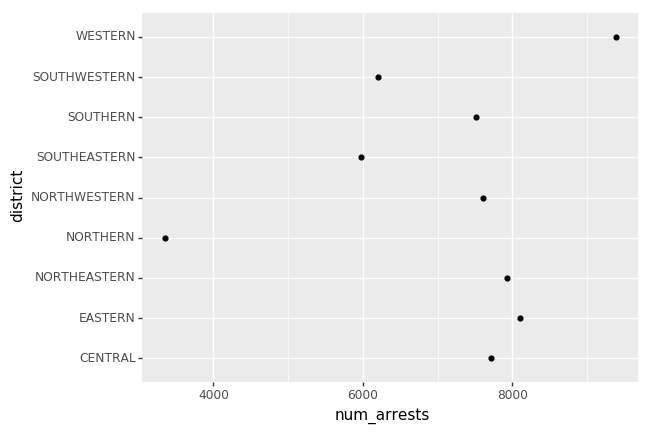

<ggplot: (317912882)>

In [26]:
(ggplot(summary_tab,aes(y='district',x='num_arrests'))
    + geom_point())

### Frequently Used Plots

Again, we use the `mpg` dataset to illustrate

In [28]:
mpg = pd.read_csv('data/auto-mpg.csv')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


/Users/hcorrada/opt/miniconda3/envs/cmsc320/lib/python3.6/site-packages/pandas/core/generic.py:5191: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/Users/hcorrada/opt/miniconda3/envs/cmsc320/lib/python3.6/site-packages/pandas/core/generic.py:5192: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


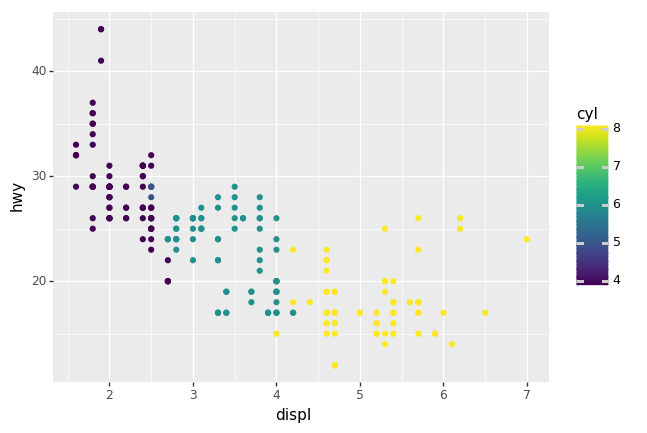

<ggplot: (320233827)>

In [29]:
# scatterplot

(ggplot(mpg, aes(x='displ', y='hwy')) 
    + geom_point(mapping=aes(color='cyl')))

/Users/hcorrada/opt/miniconda3/envs/cmsc320/lib/python3.6/site-packages/pandas/core/generic.py:5191: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/Users/hcorrada/opt/miniconda3/envs/cmsc320/lib/python3.6/site-packages/pandas/core/generic.py:5192: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
/Users/hcorrada/opt/miniconda3/envs/cmsc320/lib/python3.6/site-packages/plotnine/positions/position.py:188: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  intervals = data[xminmax].drop_duplicates().as_matrix().flatten()


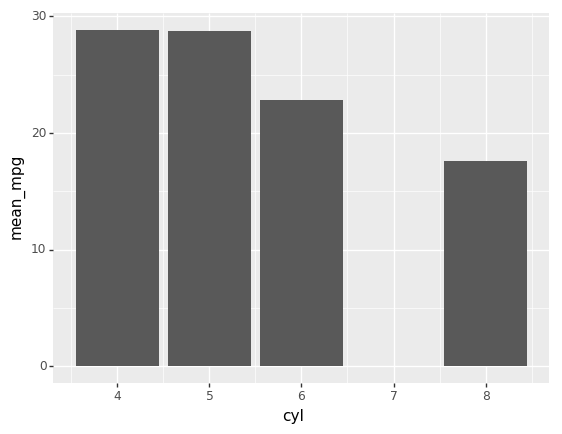

<ggplot: (-9223372036534544303)>

In [30]:
# barplot
plot_df = (mpg
           .groupby('cyl')
           .agg({'hwy': 'mean'})
           .reset_index()
           .rename(columns={'hwy': 'mean_mpg'}))
(ggplot(plot_df,aes(x='cyl',y='mean_mpg')) +
        geom_bar(stat='identity'))

/Users/hcorrada/opt/miniconda3/envs/cmsc320/lib/python3.6/site-packages/plotnine/stats/stat_bin.py:90: UserWarning: 'stat_bin()' using 'bins = 11'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']))
/Users/hcorrada/opt/miniconda3/envs/cmsc320/lib/python3.6/site-packages/pandas/core/generic.py:5191: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/Users/hcorrada/opt/miniconda3/envs/cmsc320/lib/python3.6/site-packages/pandas/core/generic.py:5192: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
/Users/hcorrada/opt/miniconda3/envs/cmsc320/lib/python3.6/site-packages/plotnine/positions/position.py:188: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  intervals = data[xminmax].drop_duplicates().as_matrix().flatten()


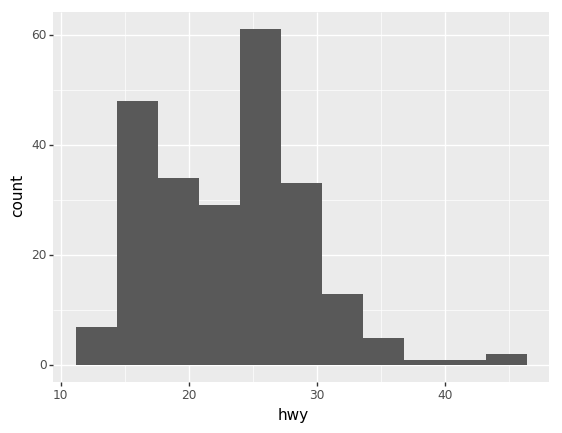

<ggplot: (320242475)>

In [31]:
# histogram

(ggplot(mpg, aes(x='hwy')) 
    + geom_histogram())

/Users/hcorrada/opt/miniconda3/envs/cmsc320/lib/python3.6/site-packages/plotnine/utils.py:284: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
/Users/hcorrada/opt/miniconda3/envs/cmsc320/lib/python3.6/site-packages/pandas/core/generic.py:5191: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/Users/hcorrada/opt/miniconda3/envs/cmsc320/lib/python3.6/site-packages/pandas/core/generic.py:5192: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
/Users/hcorrada/opt/miniconda3/envs/cmsc320/lib/python3.6/site-packages/plotnine/positions/position.py:188: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  intervals = data[xminmax].drop_duplicates().as_matrix().flatten()


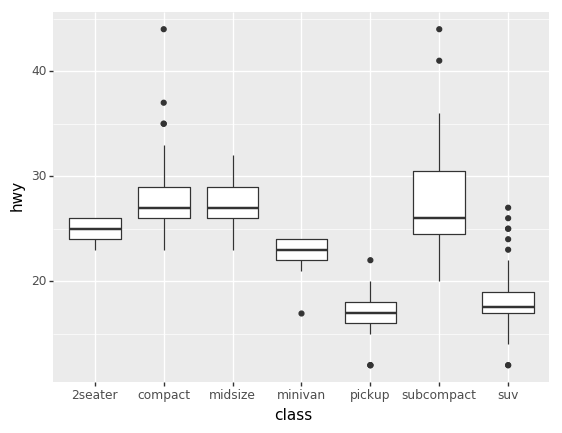

<ggplot: (-9223372036534544324)>

In [32]:
# boxplot

(ggplot(mpg, aes(x='class', y='hwy')) 
    + geom_boxplot())